In [2]:
(require '[acausal.core :as a] :reload-all)

In [11]:
(def N 1000)

(def num-vars
    "Number of variables per model."
    15)

(def num-latent
    "Number of non-observable variables per model."
    10)

(def v
    "Variables of the models"
    (a/gen-nodes num-vars))

v

[:n_1 :n_2 :n_3 :n_4 :n_5 :n_6 :n_7 :n_8 :n_9 :n_10 :n_11 :n_12 :n_13 :n_14 :n_15]

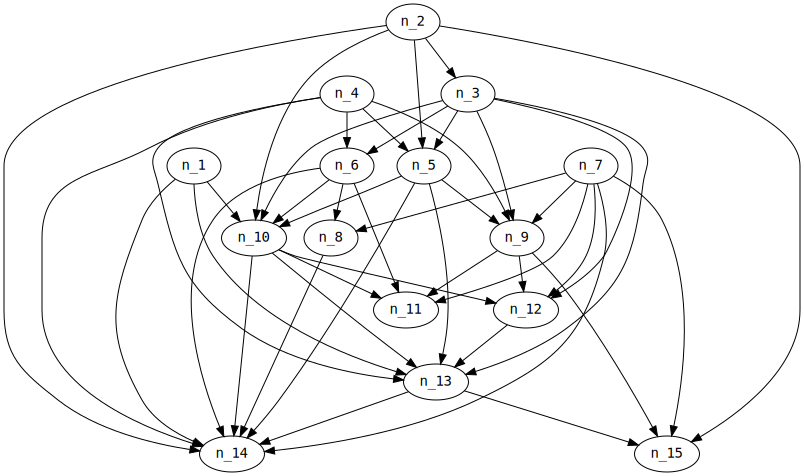

In [12]:
(def random-markovian-models
    "Some random Makrovian causal diagrams from the Erdos-Renyi model, p = ln(N)/N"
    (take N
          (repeatedly #(a/erdos-renyi-model num-vars (* 2 (/ (java.lang.Math/log num-vars) num-vars))))))

(rand-nth random-markovian-models)

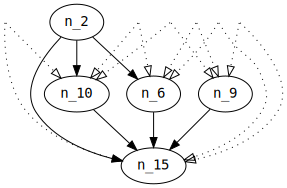

In [5]:
(def random-semimarkovian-models
    "Some random semi-Markovian causal diagrams"
    (map #(a/latent-projection % (take num-latent (shuffle v)))
         random-markovian-models))

(rand-nth random-semimarkovian-models)

In [7]:
(count
    (filter #(true? %)
            (for [model random-semimarkovian-models]
                (let [vars (shuffle (a/verticies model))
                      x [(first vars)]
                      y [(second vars)]]
                    (a/identifiable?
                        model
                        (a/q y :do x))))))

831

In [8]:
(a/identifiable? (first random-semimarkovian-models) (a/q [:n_13] :do [:n_4]))

true

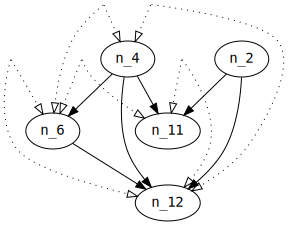

In [9]:
(first random-semimarkovian-models)

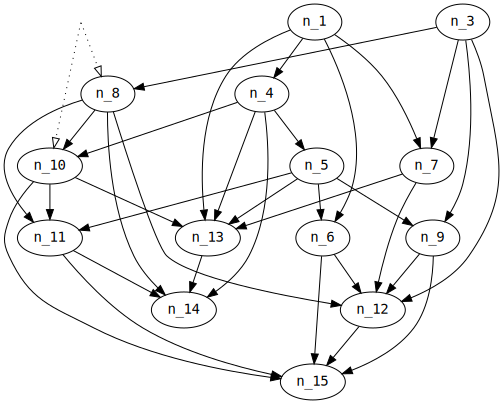

In [10]:
(a/latent-projection (first random-markovian-models) [:n_2])